In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dfTrain = pd.read_csv("data/train.csv")

In [3]:
dfTrain.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
tNullRows = dfTrain.isnull().sum().sort_values(ascending=False)
percent = (dfTrain.isnull().sum()/len(dfTrain)).sort_values(ascending=False)
missing_data = pd.concat([tNullRows,percent], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data['Total']>0]

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [5]:
dfTrain.dropna(axis=1, how='any', inplace=True)

In [6]:
dfTrain.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,223.00,477.5,808.00,2336.0


<h3>Variables numèriques</h3>
Vamos a centrarnos un momento en la varible dependiente del análisis: el precio de venta

In [7]:
dfTrain['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Podem veure la seva distribució amb l'histograma.

<AxesSubplot:>

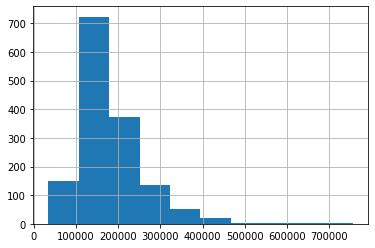

In [8]:
dfTrain['SalePrice'].hist()

Com podem veure es tracta de una distribució unicentrada amb cua cap a la dreta. Veiem doncs que no es tracta d'una distribució normal. Això podem veure-ho amb més facilitat comparant-la amb una distribució d'aquest tipus.

C:\Users\Ayla Pajares\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

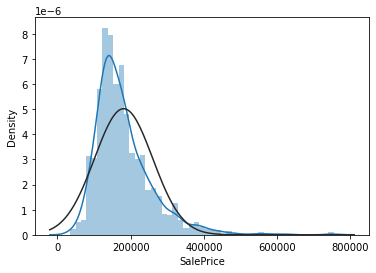

In [9]:
from scipy.stats import norm
sns.distplot(dfTrain['SalePrice'], fit = norm)

La funció skew calcula el coeficient d'assimetria. Si és positiu i més gran que u, com en el nostre cas, els valors de la distribució són més densos cap a l'esquerra de la gràfica. En una distribució normal, el coeficient d'assimetria seria proper a zero.

In [10]:
dfTrain['SalePrice'].skew()

1.8828757597682129

La funció kurtosis ens dóna una idea de la relació del pic central amb els extrems de la campana de la distribució. Si és proper a 1, el valor serà coherent amb la normalitat de la variable

In [11]:
dfTrain['SalePrice'].kurt()

6.536281860064529

C:\Users\Ayla Pajares\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

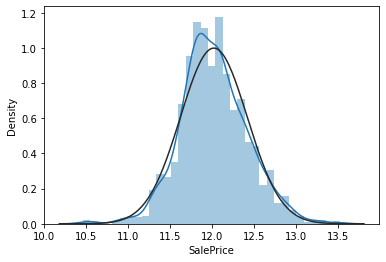

In [12]:
dfTrain['SalePrice'] = np.log1p(dfTrain['SalePrice'])
sns.distplot(dfTrain['SalePrice'], fit = norm)

In [13]:
dfTrain['SalePrice'].skew()

0.12134661989685333

In [14]:
dfTrain['SalePrice'].kurt()

0.809519155707878

<h3>Variables categòriques</h3>

Veiem l'histograma d'una variable.

<AxesSubplot:>

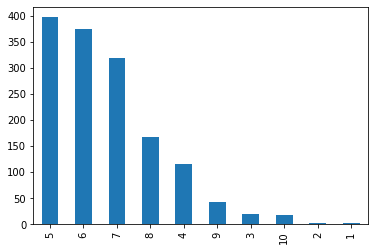

In [15]:
dfTrain['OverallQual'].value_counts().plot(kind = 'bar')

<h3>Anàlisis bivariant</h3>
En aquest cas podem veure quina és la relació entre el preu de venda i la superfície construida amb un scatter plot o diagrama de punts.

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

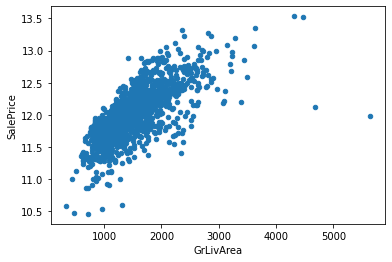

In [16]:
data = pd.concat([dfTrain['SalePrice'], dfTrain['GrLivArea']],axis=1)
data.plot.scatter(x='GrLivArea',y='SalePrice')

En el cas d'una variable categòrica com la qualificació, podem visualitzar la relació amb un boxplot o diagrama de caixes.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

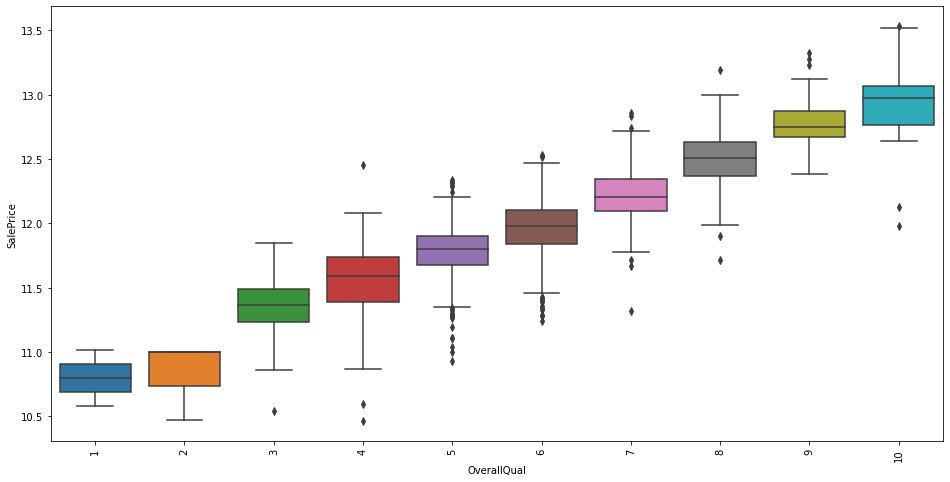

In [19]:
dataPlot = pd.concat([dfTrain['SalePrice'],dfTrain['OverallQual']],axis=1)
f, ax = plt.subplots(figsize=(16,8))
fig=sns.boxplot(x='OverallQual',y='SalePrice',data=dataPlot)
plt.xticks(rotation=90)

Per veure la relació entre varies variables

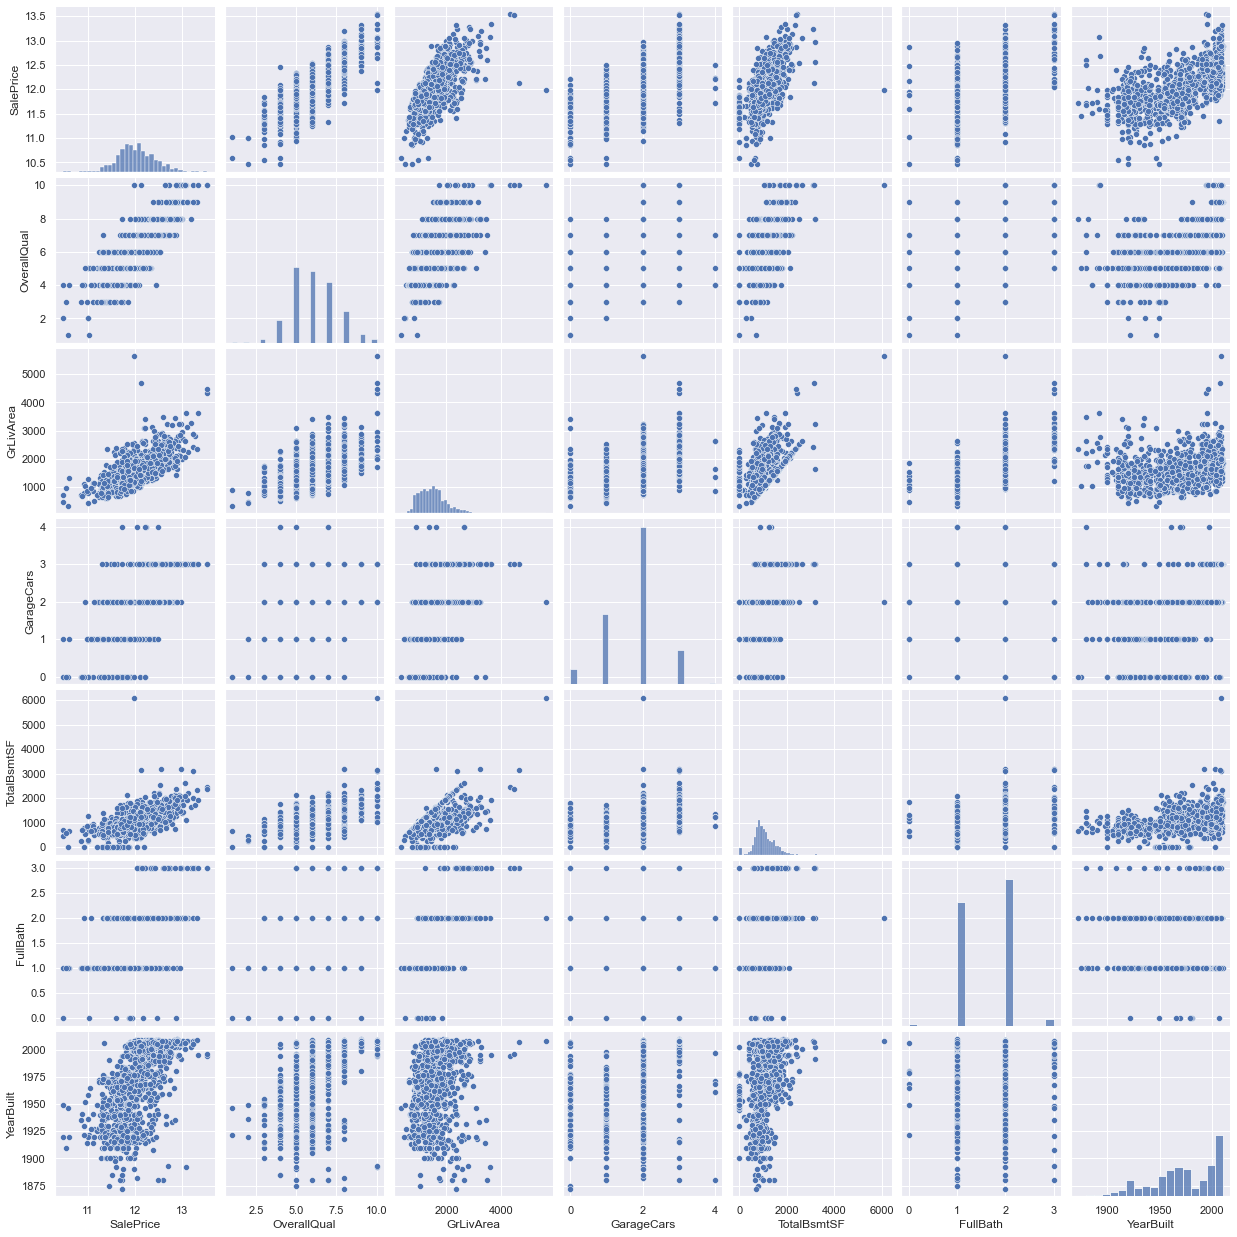

In [21]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(dfTrain[cols], height= 2.5)
plt.show()